# Trajectory Analysis for Siddharth's CRP simulations

In [1]:
import mdtraj as md
import matplotlib
matplotlib.use('Agg')
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [2]:
t = md.load(['run1_01122018/crp_run.dcd','run2_02242018/crp_run.dcd', 'run3_03012018/crp_run.dcd'], top='run1_01122018/crp_full_solv_ion_mini.psf')

Subset trajectory so that waters/solvent is removed and only protein + chains corresponding to PCL and Ca2+ remain

In [3]:
t.atom_slice(t.top.select('(chainid 0) or (chainid 1) or (chainid 2)'),inplace=True)

<mdtraj.Trajectory with 30000 frames, 3251 atoms, 209 residues, and unitcells at 0x7f218cf76128>

In [9]:
t

<mdtraj.Trajectory with 30000 frames, 3251 atoms, 209 residues, and unitcells at 0x7efd95987c50>

## Distance between PC oxygens and Calcium ions

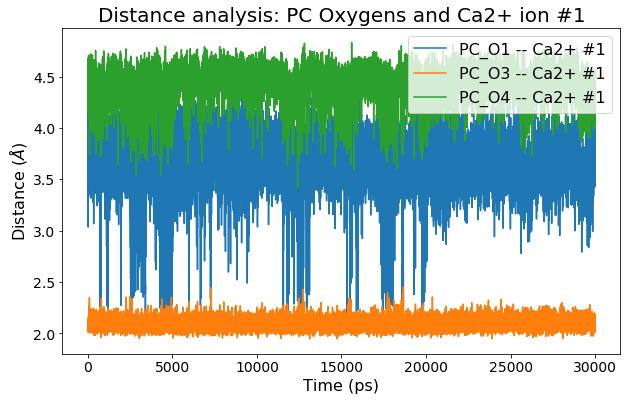

In [34]:
dists_cal1_O_PCL = md.compute_distances(t,[[3225,3235],[3225,3249],[3225,3250]]) #O1 - 3235, O3 - 3249, O4 - 3250,
plt.figure(figsize=(10,6))
plt.plot(dists_cal1_O_PCL[:,0]*10, label='PC_O1 -- Ca2+ #1')
plt.plot(dists_cal1_O_PCL[:,1]*10, label='PC_O3 -- Ca2+ #1')
plt.plot(dists_cal1_O_PCL[:,2]*10, label='PC_O4 -- Ca2+ #1')
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Time (ps)', size=16)
plt.ylabel(r'Distance ($\AA$)', size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Distance analysis: PC Oxygens and Ca2+ ion #1', size=20)
plt.savefig('Dist_PC_O_Ca2_1.png',dpi=300)

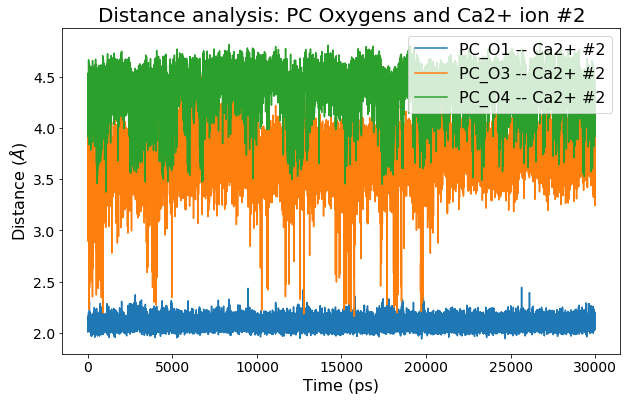

In [33]:
dists_cal2_O_PCL = md.compute_distances(t,[[3226,3235],[3226,3249],[3226,3250]]) #O1 - 3235, O3 - 3249, O4 - 3250,
plt.figure(figsize=(10,6))
plt.plot(dists_cal2_O_PCL[:,0]*10, label='PC_O1 -- Ca2+ #2')
plt.plot(dists_cal2_O_PCL[:,1]*10, label='PC_O3 -- Ca2+ #2')
plt.plot(dists_cal2_O_PCL[:,2]*10, label='PC_O4 -- Ca2+ #2')
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Time (ps)', size=16)
plt.ylabel(r'Distance ($\AA$)', size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Distance analysis: PC Oxygens and Ca2+ ion #2', size=20)
plt.savefig('Dist_PC_O_Ca2_2.png',dpi=300)

## Distance between PC charged quaternary Nitrogen and acidic sidechain of Glu81

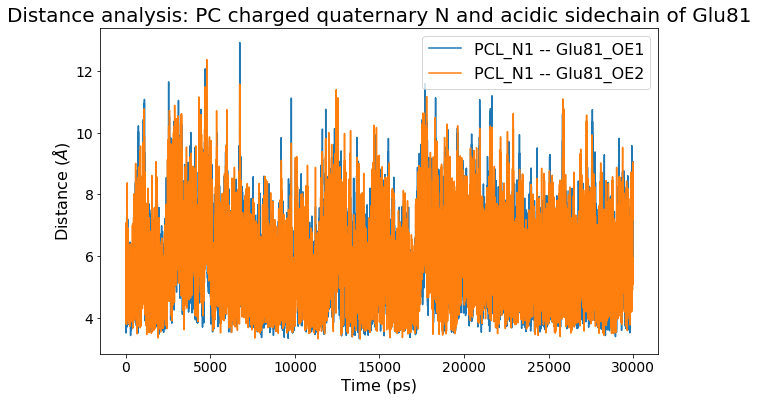

In [32]:
dists_glu81_OE1_OE2_PCL = md.compute_distances(t,[[1290,3228],[1291,3228]]) #OE1 - 1290, OE2 - 1291, PCL_N1 - 3228
plt.figure(figsize=(10,6))
plt.plot(dists_glu81_OE1_OE2_PCL[:,0]*10, label='PCL_N1 -- Glu81_OE1')
plt.plot(dists_glu81_OE1_OE2_PCL[:,1]*10, label='PCL_N1 -- Glu81_OE2')
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Time (ps)', size=16)
plt.ylabel(r'Distance ($\AA$)', size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Distance analysis: PC charged quaternary N and acidic sidechain of Glu81', size=20)
plt.savefig('Dist_PC_N_Glu81_sidechain.png',dpi=300)

In [21]:
np.sum(dists_glu81_OE1_OE2_PCL[:,0] < .6) / t.n_frames * 100

57.589999999999996

The occupancy of how often this interaction occurs/ when the the acidic sidechain of Glu81 and the quaternary Nitrogen of PC are within 6 angstroms is **57.6%**


## Distance between Calcium ions and suggested binding sites

In [24]:
dist_cal1_bindingsite = md.compute_contacts(t,[[206,59],[206,60],[206,137],[206,138],[206,139]],scheme='closest', ignore_nonprotein=False)

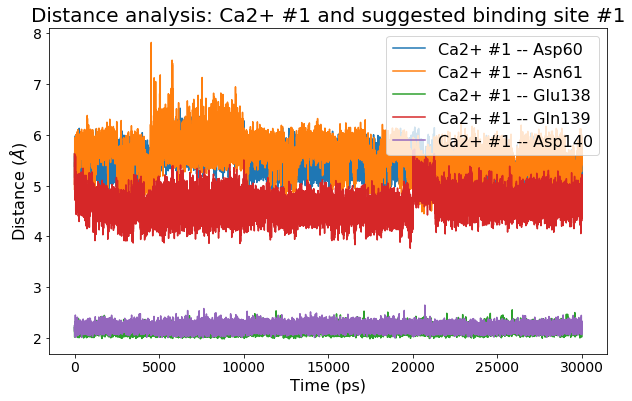

In [31]:
plt.figure(figsize=(10,6))
plt.plot(dist_cal1_bindingsite[0][:,0]*10, label='Ca2+ #1 -- Asp60')
plt.plot(dist_cal1_bindingsite[0][:,1]*10, label='Ca2+ #1 -- Asn61')
plt.plot(dist_cal1_bindingsite[0][:,2]*10, label='Ca2+ #1 -- Glu138')
plt.plot(dist_cal1_bindingsite[0][:,3]*10, label='Ca2+ #1 -- Gln139')
plt.plot(dist_cal1_bindingsite[0][:,4]*10, label='Ca2+ #1 -- Asp140')
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Time (ps)', size=16)
plt.ylabel(r'Distance ($\AA$)', size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Distance analysis: Ca2+ #1 and suggested binding site #1', size=20)
plt.savefig('Dist_Ca2_1_bindingsite.png',dpi=300)

In [26]:
dist_cal2_bindingsite = md.compute_contacts(t,[[207,137],[207,139],[207,146],[207,149]],scheme='closest', ignore_nonprotein=False)

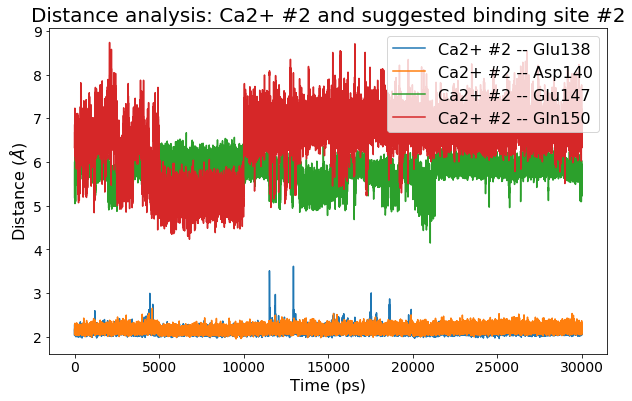

In [30]:
plt.figure(figsize=(10,6))
plt.plot(dist_cal2_bindingsite[0][:,0]*10, label='Ca2+ #2 -- Glu138')
plt.plot(dist_cal2_bindingsite[0][:,1]*10, label='Ca2+ #2 -- Asp140')
plt.plot(dist_cal2_bindingsite[0][:,2]*10, label='Ca2+ #2 -- Glu147')
plt.plot(dist_cal2_bindingsite[0][:,3]*10, label='Ca2+ #2 -- Gln150')
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Time (ps)', size=16)
plt.ylabel(r'Distance ($\AA$)', size=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.title('Distance analysis: Ca2+ #2 and suggested binding site #2', size=20)
plt.savefig('Dist_Ca2_2_bindingsite.png',dpi=300)